In [1]:
from libs import edgeDetection, equalization, noise, normalization, rgb2grey, hybridImage, lowPassFilters, thresholding, helper, frequency_domain_filters, snake

In [2]:
from PIL import Image, ImageOps
import numpy as np

In [3]:
image_path = './assets/apple.jpg'
# image_path = './assets/cat.jpg'

Read image using PIL

In [4]:
og_image = Image.open(image_path)

Convert image to grayscale

In [5]:
gray_image = ImageOps.grayscale(og_image)

Resize image for faster outputs

In [6]:
resized_gray_img = helper.resize_img(gray_image)

Convert PIL.img to numpy array

In [7]:
np_image = np.array(gray_image)
resized_np_image = np.array(resized_gray_img)

Additive_noise

In [ ]:
gaussian = noise.gaussian_noise(og_image)
uniform = noise.uniform_noise(og_image)
s_and_p = noise.s_and_p_noise(resized_np_image)
helper.show_images([gaussian, uniform, s_and_p],
                   "Additive Noise", ["Gaussian", "Uniform", "S & P"])

Filter noisy images

In [ ]:
average_filter = lowPassFilters.average_filter(image_path)
gaussian_filter = lowPassFilters.apply_gaussian_filter(image_path)
median_filter = lowPassFilters.median_filter(image_path)
helper.show_images([gaussian_filter, gaussian_filter, gaussian_filter],
                   "Filters", ["Average", "Gaussian", "Median"])

Edge detection

In [ ]:
sobel = edgeDetection.sobel_detector(resized_np_image)
prewitt = edgeDetection.prewitt_detector(resized_np_image)
roberts = edgeDetection.roberts_detector(resized_np_image)
canny = edgeDetection.canny_detector(resized_np_image)
helper.show_images([sobel, prewitt, roberts, canny],
                   "Edge Detection", ["Sobel", "Prewitt", "Roberts", "Canny"])

Equalization

In [ ]:
equalized_img = equalization.equalization(image_path)
helper.show_images([np_image, equalized_img],
                   "Equalization", ["Original", "Equalized"])

Normalization

In [ ]:
normalized_img, _, _ = normalization.normalize_histogram(np_image)
helper.show_images([np_image, normalized_img],
                   "Normalization", ["Original", "Normalized"])

Local and global thresholding

In [ ]:
global_return = thresholding.global_thresholding(np_image, 173)
local_return = thresholding.local_thresholding(resized_gray_img)
helper.show_images([global_return, local_return],
                   "Thresholding", ["Global", "Local"])

Transformation from color image to grayscale image

In [ ]:
rgb_image, gray_scale_image = rgb2grey.rgb2Gray(image_path)
rgb2grey.plot_RGB_Histo(rgb_image)
helper.show_images([rgb_image, gray_scale_image],
                   "RGB to Grayscale", ["RGB", "Grayscale"])

Frequency domain filters

In [ ]:
lpf_filter = frequency_domain_filters.filter_fun(np_image, 100, "lpf")
hpf_filter = frequency_domain_filters.filter_fun(np_image, 100, "hpf")
helper.show_images([lpf_filter, hpf_filter],
                   "Frequency domain filters", ["LPF", "HPF"])

Hybrid images<br>
Read two images using PIL to mix them together

In [ ]:
cat_path = './assets/cat.jpg'
dog_path = './assets/dog.jpg'
cat_img = Image.open(cat_path)
dog_img = Image.open(dog_path)

Convert both images to grayscale

In [ ]:
gray_cat = ImageOps.grayscale(cat_img)
gray_dog = ImageOps.grayscale(dog_img)

Convert both images to numpy array

In [ ]:
gray_cat_np = np.array(gray_cat)
gray_dog_np = np.array(gray_dog)

Mix them together

In [ ]:
hybrid_img = hybridImage.hybrid_image(gray_cat_np, gray_dog_np)
helper.show_images([gray_cat_np, gray_dog_np, hybrid_img],
                   "Hybrid images", ["Cat", "Dog", "Hybrid"])

Active Contour

active_contour.png saved successfully in output directory.


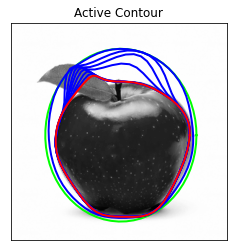

In [8]:
snake.activeContour(resized_np_image)